In [20]:
%load_ext autoreload
%autoreload 2
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from data_manager import *
from metrics import *
from models import *
from preprocessing import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df_raw = get_train()
df_raw=df_raw[~df_raw.target.isnull()]
df_train_raw, df_test_raw = split_by_date(df_raw, split_ratio=0.2)

df = add_feat(df_raw)
df_train = add_feat(df_train_raw)
df_test = add_feat(df_test_raw)

data/optiver-trading-at-the-close/train.csv - loaded
imbalance_size_rel, wap60, wap_ret - added
imbalance_size_rel, wap60, wap_ret - added
imbalance_size_rel, wap60, wap_ret - added


In [8]:
print(f"df shape = {df.shape}")
print(f"train shape = {df_train.shape}")
print(f"test shape = {df_test.shape}")

display(df.describe())
df.head()

df shape = (5237892, 20)
train shape = (4181948, 20)
test shape = (1055944, 20)


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,imbalance_size_rel,wap60,wap_ret
count,5.237892e+06,5.237892e+06,5.237892e+06,5.237760e+06,5.237892e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237892e+06,5.237760e+06,5.237892e+06,5.237760e+06,5.237892e+06,5.237892e+06,5.237760e+06,4.666368e+06,4.666368e+06
mean,9.928777e+01,2.415097e+02,2.700008e+02,5.715293e+06,-1.189620e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181445e+04,1.000264e+00,5.357658e+04,9.999920e-01,-4.756125e-02,1.331003e+04,-2.524656e+05,9.999921e-01,2.109276e-02
std,5.787187e+01,1.385313e+02,1.587450e+02,2.051591e+07,8.853447e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114221e+05,2.510042e-03,1.293563e+05,2.497509e-03,9.452860e+00,7.619238e+03,2.129562e+07,2.617224e-03,1.113927e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,5.600000e-01,9.398270e-01,5.900000e-01,9.380080e-01,-3.852898e+02,0.000000e+00,-2.982028e+09,9.380080e-01,-3.928415e+02
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.375160e+03,9.990290e-01,7.824000e+03,9.987810e-01,-4.559755e+00,6.729000e+03,-1.217970e+06,9.986560e-01,-5.443318e+00
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196980e+04,1.000207e+00,2.301867e+04,9.999970e-01,-6.020069e-02,1.334500e+04,0.000000e+00,9.999570e-01,-9.996611e-03
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583240e+04,1.001414e+00,5.787932e+04,1.001149e+00,4.409552e+00,1.990700e+04,1.017940e+06,1.001273e+00,5.380843e+00
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04,1.228661e+09,1.077675e+00,3.796900e+02


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,imbalance_size_rel,wap60,wap_ret
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,3180602.69,1.000517,5.170000
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0,1299772.70,1.000421,5.290571
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0,1299772.70,1.000148,3.060484
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0,1299772.70,1.000426,3.409710
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0,1218204.43,1.000261,-0.559823


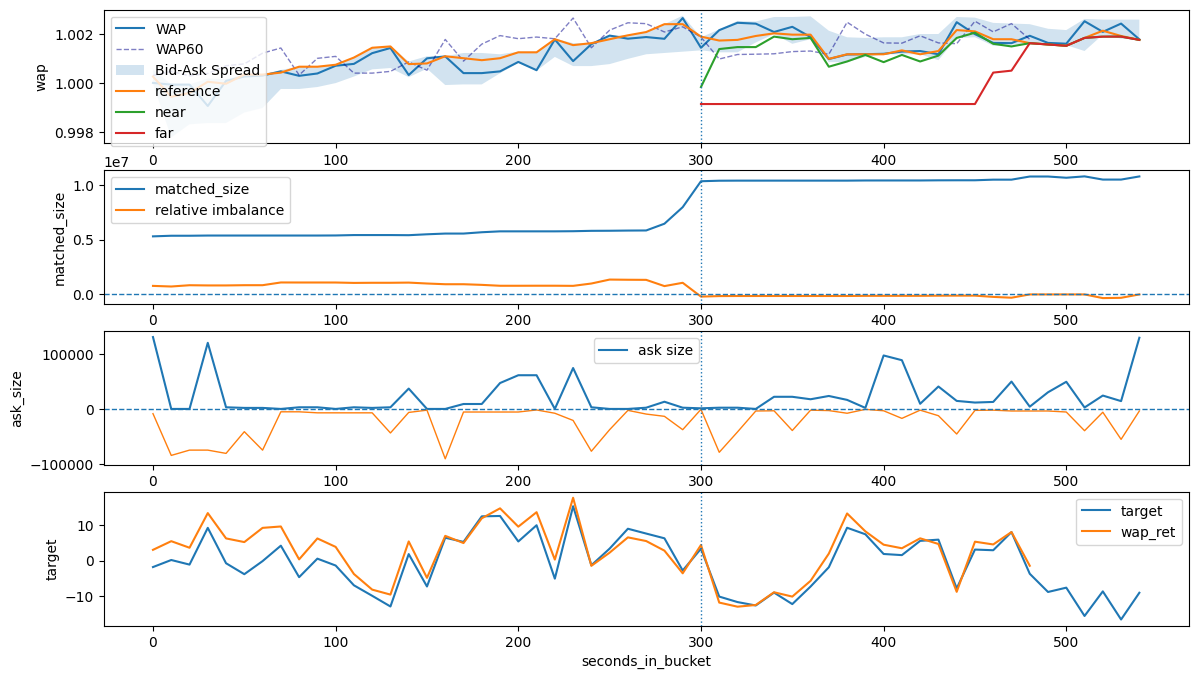

In [9]:
id = 20
date_id = 30
plot_id_date(df, id, date_id)

In [ ]:
score(df_train_raw, df_test_raw, model, preprocess)

In [19]:
# Model




model=Model_base()
preprocess = Preprocessing_base()


# df_res = pd.DataFrame([], columns=['row_id','target','pred'])
data_res = []

df_train = preprocess.preprocess(df_train_raw)
model.fit(df_train)

df_test_raw.sort_values(by=['date_id', 'stock_id', 'seconds_in_bucket'], inplace=True)
for date in tqdm(np.sort(df_test_raw.date_id.unique())):
    df_date = df_test_raw[df_test_raw.date_id==date]
    for sec in range(0, 541, 10):

        #Data setup
        test = df_date[df_date['seconds_in_bucket']==sec].copy()
        y = test['target']
        test.drop('target', axis=1, inplace=True)
        sample_prediction = pd.DataFrame({'row_id':test.row_id, 'target':np.nan})

        # #Submission model
        X_test = preprocess.preprocess(test)
        model.add_data()
        sample_prediction['target'] = model.predict(X_test)


        # #Performance assessment
        df_res_temp = sample_prediction.copy()
        df_res_temp.rename(columns={'target':'pred'}, inplace=True)
        df_res_temp['target'] = y
        data_res.append(df_res_temp)

df_res = pd.concat(data_res)
mae = mean_absolute_error(df_res.target,df_res.pred)
print(mae)
        
    

100%|██████████| 96/96 [00:08<00:00, 10.88it/s]


0.0


In [15]:
df_res = pd.concat(data_res)
df_res

,row_id,pred,target
4181980,385_0_0,0.0,-1.019835
4181981,385_0_1,0.0,7.159710
4181982,385_0_2,0.0,-6.830096
4181983,385_0_3,0.0,4.719496
4181984,385_0_4,0.0,10.230541
...,...,...,...
5237975,480_540_195,0.0,2.310276
5237976,480_540_196,0.0,-8.220077
5237977,480_540_197,0.0,1.169443
5237978,480_540_198,0.0,-1.540184


In [82]:
np.sum(df_test_raw.isnull())

stock_id                        0
date_id                         0
seconds_in_bucket               0
imbalance_size                110
imbalance_buy_sell_flag         0
reference_price               110
matched_size                  110
far_price                  582383
near_price                 576050
bid_price                     110
bid_size                        0
ask_price                     110
ask_size                        0
wap                           110
target                         56
time_id                         0
row_id                          0
dtype: int64

In [77]:
df_res

,row_id,target,pred
4181980,385_0_0,-1.019835,0.0
4181981,385_0_1,7.159710,0.0
4181982,385_0_2,-6.830096,0.0
4181983,385_0_3,4.719496,0.0
4181984,385_0_4,10.230541,0.0
...,...,...,...
5237975,480_540_195,2.310276,0.0
5237976,480_540_196,-8.220077,0.0
5237977,480_540_197,1.169443,0.0
5237978,480_540_198,-1.540184,0.0


In [61]:
test

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
4181980,0,385,0,7898324.38,1,0.999883,12079269.02,NaN,NaN,0.999883,13028.75,1.000747,83456.00,1.0,21175,385_0_0
4181981,1,385,0,2287553.69,1,1.001033,2183387.99,NaN,NaN,0.999918,511.41,1.002264,14182.21,1.0,21175,385_0_1
4181982,2,385,0,4624155.27,1,0.999084,1986127.20,NaN,NaN,0.998620,25544.64,1.001045,19399.00,1.0,21175,385_0_2
4181983,3,385,0,1432679.48,-1,0.999527,39749872.17,NaN,NaN,0.999826,10046.50,1.000174,10050.00,1.0,21175,385_0_3
4181984,4,385,0,6823905.41,-1,1.000142,16352824.74,NaN,NaN,0.999314,27136.50,1.000087,3439.95,1.0,21175,385_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182175,195,385,0,8673195.78,-1,1.000387,7605987.55,NaN,NaN,0.999835,18116.00,1.000056,6160.80,1.0,21175,385_0_195
4182176,196,385,0,445828.74,-1,0.999861,5017529.04,NaN,NaN,0.999861,4003.56,1.000400,11534.99,1.0,21175,385_0_196
4182177,197,385,0,0.00,0,1.000042,2735758.92,NaN,NaN,0.999761,5550.48,1.000230,5339.50,1.0,21175,385_0_197
4182178,198,385,0,16895991.27,-1,1.000255,65491517.00,NaN,NaN,0.999744,31453.51,1.000255,31352.00,1.0,21175,385_0_198
